# SPD Crime

‘SPD Crime Data: 2008-Present | City of Seattle Open Data portal. (2023, October).https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5’.

In [ ]:
#ignore the text before any plot
%matplotlib inline
import warnings #want to see warning using geopandas
warnings.filterwarnings('ignore')

In [ ]:
#import necessary library
import numpy as np
from math import sqrt

#data processing packages
import pandas as pd
import geopandas as gpd

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#modeling
from sklearn.metrics import mean_squared_error

## Load Data

In [ ]:
#if using colab:
#SPD = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS6220 Data mining/SPD_Crime_Data__2008-Present_20231028.csv")
#SPD.head()

In [ ]:
#if using Jupyter notebook:
SPD = pd.read_csv("./SPD_Crime_Data__2008-Present_20231028.csv")
SPD.head(8)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
5,2020-044142,12605077150,02/04/2020 10:59:00 PM,NaN,02/05/2020 12:45:08 AM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M1,DOWNTOWN COMMERCIAL,14XX BLOCK OF 2ND AVE,-122.338450,47.608789
6,2020-044104,12605029468,02/04/2020 08:30:00 PM,02/04/2020 08:45:00 PM,02/04/2020 11:31:52 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
7,2020-043988,12604995759,02/04/2020 07:58:00 PM,NaN,02/04/2020 10:46:19 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,SW,F,F2,ROXHILL/WESTWOOD/ARBOR HEIGHTS,26XX BLOCK OF SW BARTON ST,-122.367312,47.521028


In [ ]:
#check df shape, null values, and dtypes
SPD.info()
#a lot of null values in Offense End DateTime
# Dates need to be converted to datetime; features need to be converted to categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080724 entries, 0 to 1080723
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Report Number           1080724 non-null  object 
 1   Offense ID              1080724 non-null  int64  
 2   Offense Start DateTime  1079253 non-null  object 
 3   Offense End DateTime    614180 non-null   object 
 4   Report DateTime         1080724 non-null  object 
 5   Group A B               1080724 non-null  object 
 6   Crime Against Category  1080724 non-null  object 
 7   Offense Parent Group    1080724 non-null  object 
 8   Offense                 1080724 non-null  object 
 9   Offense Code            1080724 non-null  object 
 10  Precinct                1080706 non-null  object 
 11  Sector                  1080708 non-null  object 
 12  Beat                    1080708 non-null  object 
 13  MCPP                    1080710 non-null  object 
 14  10

In [ ]:
# Descriptive statistics
SPD.describe()
#no valid numerical value

,Offense ID,Longitude,Latitude
count,1.080724e+06,1.080724e+06,1.080724e+06
mean,1.344720e+10,-1.169715e+02,4.554273e+01
std,1.148001e+10,2.505538e+01,9.746304e+00
min,7.624429e+09,-1.659980e+02,0.000000e+00
25%,7.655922e+09,-1.223475e+02,4.758025e+01
50%,7.684544e+09,-1.223290e+02,4.761413e+01
75%,1.262597e+10,-1.223095e+02,4.766332e+01
max,5.280596e+10,1.681750e+02,8.999999e+01


In [ ]:
# Check for missing values counts
SPD.isnull().sum()
# '100 Block Address' also have a lot of missing values.

Report Number                  0
Offense ID                     0
Offense Start DateTime      1471
Offense End DateTime      466544
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                      18
Sector                        16
Beat                          16
MCPP                          14
100 Block Address          47239
Longitude                      0
Latitude                       0
dtype: int64

In [ ]:
#check column and indexing
SPD.columns

Index(['Report Number', 'Offense ID', 'Offense Start DateTime',
       'Offense End DateTime', 'Report DateTime', 'Group A B',
       'Crime Against Category', 'Offense Parent Group', 'Offense',
       'Offense Code', 'Precinct', 'Sector', 'Beat', 'MCPP',
       '100 Block Address', 'Longitude', 'Latitude'],
      dtype='object')

## SPD Crime Data Preprocessing

### Missing Values

In [ ]:
#recheck missing values
SPD.isnull().sum()

Report Number                  0
Offense ID                     0
Offense Start DateTime      1471
Offense End DateTime      466544
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                      18
Sector                        16
Beat                          16
MCPP                          14
100 Block Address          47239
Longitude                      0
Latitude                       0
dtype: int64

In [ ]:
#Drop rows with missing Precinct, Sector, Beat, or MCPP
cols_to_check = ['Precinct', 'Sector', 'Beat', 'MCPP','100 Block Address']
SPD.dropna(subset=cols_to_check, inplace=True)
SPD.isnull().sum()

Report Number                  0
Offense ID                     0
Offense Start DateTime      1243
Offense End DateTime      439744
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                       0
Sector                         0
Beat                           0
MCPP                           0
100 Block Address              0
Longitude                      0
Latitude                       0
dtype: int64

### DateTime conversion

In [ ]:
# convert start time. End time is not converted as it is less important for our analysis
SPD["Offense Start DateTime"] = pd.to_datetime(SPD["Offense Start DateTime"])
SPD["Offense Start DateTime"].dtype #check dtype

dtype('<M8[ns]')

In [ ]:
#no null values on Report DateTime!
SPD["Report DateTime"] = pd.to_datetime(SPD["Report DateTime"])
SPD["Report DateTime"].dtype

dtype('<M8[ns]')

In [ ]:
#Drop rows where 'Offense Start DateTime' is missing after conversion
#there is only ~1400 samples with N/A, so better remove than impute

SPD.dropna(subset=['Offense Start DateTime'], inplace=True)
SPD['Offense Start DateTime'].isnull().sum()

0

In [ ]:
# Ensure that there are no dates <2008 and dates in the future
print("Earliest start time in the dataset: ", SPD['Offense Start DateTime'].min())
print("Earliest report time in the dataset: ", SPD['Report DateTime'].min())
print("Latest start time in the dataset: ", SPD['Offense Start DateTime'].max())
print("Latest report time in the dataset: ", SPD['Report DateTime'].max())

#will filter time on next section

Earliest start time in the dataset:  1908-12-13 21:14:00
Earliest report time in the dataset:  2008-01-01 00:02:00
Latest start time in the dataset:  2023-10-12 03:09:00
Latest report time in the dataset:  2023-10-26 06:42:46


### SPD clean: Extract Time as Features

will filter here (year < 2008) since it is INT

In [ ]:
SPD_clean = SPD.copy()

#extract date parts to generalize data
SPD_clean['YEAR']= SPD_clean['Offense Start DateTime'].dt.year
SPD_clean['MONTH'] = SPD_clean['Offense Start DateTime'].dt.month
#SPD_clean['DAYofMONTH'] = SPD_clean['Offense Start DateTime'].dt.day
#SPD_clean['DAYofWEEK'] = SPD_clean['Offense Start DateTime'].dt.dayofweek
#SPD_clean['TIMEofDAY'] = SPD_clean['Offense Start DateTime'].dt.hour
SPD_clean.head(3)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,YEAR,MONTH
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2


In [ ]:
#check hour conversion
#SPD_clean['TIMEofDAY'].nunique()

24

In [ ]:
#defining seasons and time of the day
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return "Invalid Month"

def categorize_time_of_day(timestamp):
    hour = timestamp.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

In [ ]:
#Fetching season column
SPD_clean.MONTH=SPD_clean.MONTH.astype(int)
SPD_clean['SEASON'] = SPD_clean['MONTH'].apply(get_season)
SPD_clean['TIMEOFDAY'] = SPD_clean['Offense Start DateTime'].apply(categorize_time_of_day)
SPD_clean.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,YEAR,MONTH,SEASON,TIMEOFDAY
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2,Winter,Morning
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2,Winter,Morning
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,...,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2,Winter,Night
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2,Winter,Night
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2,Winter,Night


In [ ]:
SPD_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032237 entries, 0 to 1080723
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Report Number           1032237 non-null  object        
 1   Offense ID              1032237 non-null  int64         
 2   Offense Start DateTime  1032237 non-null  datetime64[ns]
 3   Offense End DateTime    593594 non-null   object        
 4   Report DateTime         1032237 non-null  datetime64[ns]
 5   Group A B               1032237 non-null  object        
 6   Crime Against Category  1032237 non-null  object        
 7   Offense Parent Group    1032237 non-null  object        
 8   Offense                 1032237 non-null  object        
 9   Offense Code            1032237 non-null  object        
 10  Precinct                1032237 non-null  object        
 11  Sector                  1032237 non-null  object        
 12  Beat               

In [ ]:
#ensure no invalid season
SPD_clean['SEASON'].unique()

array(['Winter', 'Fall', 'Summer', 'Spring'], dtype=object)

### Row Validation

Remove values that are not useful

In [ ]:
#remove invalid location
SPD_clean = SPD_clean.loc[~((SPD_clean['Precinct'] == "UNKNOWN") |
                  (SPD_clean['Precinct'] == "<Null>") |
                  (SPD_clean['Sector'] == "UNKNOWN") |
                  (SPD_clean['Beat'] == "UNKNOWN") |
                  (SPD_clean['MCPP'] == "UNKNOWN"))]
SPD_clean.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,YEAR,MONTH,SEASON,TIMEOFDAY
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2,Winter,Morning
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2,Winter,Morning
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,...,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2,Winter,Night
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2,Winter,Night
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2,Winter,Night


### Geolocation validation

**Validate Long Lat**

From Census data (see below), here is the geolocation details for State of Washington. So we can limit the Long Lat based on this:


<Projected CRS: EPSG:2926>
Name: NAD83(HARN) / Washington North (ftUS)

Axis Info [cartesian]:

- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Washington - SPCS83 - N
- bounds: (-124.79, 47.08, -117.02, 49.05)
Coordinate Operation:
- name: SPCS83 Washington North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#check if any of location out of bounds
SPD_clean.loc[SPD_clean["Longitude"] > -117.02]

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,YEAR,MONTH,SEASON,TIMEOFDAY
871549,2021-914384,26954404015,2021-08-16 19:00:00,08/16/2021 08:45:00 PM,2021-08-17 12:34:37,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,...,Q,Q1,MAGNOLIA,24XX BLOCK OF W COMMODORE WAY,0.000000,0.000000,2021,8,Summer,Night
889160,2021-235358,27271575933,2021-06-06 00:00:00,06/06/2021 12:00:00 AM,2021-09-08 12:03:01,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,...,R,R2,CLAREMONT/RAINIER VISTA,27XX BLOCK OF S ANDOVER ST,0.000000,0.000000,2021,6,Summer,Night
894824,2021-269599,28061390887,2021-10-11 18:40:00,NaN,2021-10-11 19:14:57,A,PERSON,ASSAULT OFFENSES,Aggravated Assault,13A,...,K,K1,DOWNTOWN COMMERCIAL,I5 SB / MADISON ST,0.000000,0.000000,2021,10,Fall,Night
897040,2015-432978,7697582602,2015-12-14 12:30:00,12/14/2015 01:00:00 PM,2015-12-14 15:30:00,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,...,S,S3,RAINIER VIEW,51XX BLOCK OF S GARDEN LOOP RD,0.000000,0.000000,2015,12,Winter,Afternoon
910389,2021-252272,27599847782,2021-09-24 15:30:00,NaN,2021-09-24 17:15:21,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,...,U,U2,UNIVERSITY,25TH AVE NE / NE 45TH ST,0.000000,0.000000,2021,9,Fall,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066900,2023-264951,52281351366,2023-09-12 19:19:00,09/12/2023 07:22:00 PM,2023-09-13 15:02:41,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,...,N,N3,NORTHGATE,23XX BLOCK OF N 113TH PL,-87.902007,89.999989,2023,9,Fall,Night
1071934,2023-233190,51890389160,2023-08-14 07:00:00,08/14/2023 01:20:00 PM,2023-08-14 15:37:26,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,...,J,J1,BALLARD NORTH,3220TH NW ESPLANADE,-99.985005,89.999989,2023,8,Summer,Morning
1072861,2023-915119,52188592711,2023-09-03 18:15:00,09/03/2023 10:00:00 PM,2023-09-04 15:43:38,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,D,D2,SLU/CASCADE,7XX BLOCK OF DENNY WAY,0.000000,0.000000,2023,9,Fall,Night
1073786,2023-292415,52542929015,2023-10-08 00:00:00,10/09/2023 12:00:00 AM,2023-10-09 09:38:59,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,...,D,D3,SLU/CASCADE,6XX BLOCK OF E EASTLAKE AVE E,49.771057,89.999989,2023,10,Fall,Night


In [ ]:
#check out of bounds Long Lat
# crs bounds: (-124.79, 47.08, -117.02, 49.05)
# can remove these values

SPD_clean["Crime Against Category"].loc[((
    SPD_clean["Longitude"] > -117.02) | (
    SPD_clean["Longitude"] < -124.79) | (
    SPD_clean["Latitude"] < 47.08) | (
    SPD_clean["Latitude"] > 49.05))].value_counts()

Crime Against Category
PROPERTY    74
PERSON       7
SOCIETY      3
Name: count, dtype: int64

In [ ]:
#remove invalid Geolocation
SPD_clean = SPD_clean.loc[~((
    SPD_clean["Longitude"] > -117.02) | (
    SPD_clean["Longitude"] < -124.79) | (
    SPD_clean["Latitude"] < 47.08) | (
    SPD_clean["Latitude"] > 49.05))]
SPD_clean.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,YEAR,MONTH,SEASON,TIMEOFDAY
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2,Winter,Morning
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2,Winter,Morning
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,...,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2,Winter,Night
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2,Winter,Night
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2,Winter,Night


### Subseting

In [ ]:
#if need to reload:
SPD_clean = pd.read_csv("./SPD_crime_2008-Oct2023_raw_clean.csv",
                        index_col= [0]) #csv contains index
SPD_clean.head(5)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,YEAR,MONTH,SEASON,TIMEOFDAY
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2,Winter,Morning
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2,Winter,Morning
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,...,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2,Winter,Night
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2,Winter,Night
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2,Winter,Night


In [ ]:
#subset the important features only
df_crime = SPD_clean.copy()
df_crime = df_crime.drop(["Offense ID", #"Report Number",
                          "Offense End DateTime", "Report DateTime",
                         "100 Block Address"], axis = True)
df_crime.head()

,Report Number,Offense Start DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,YEAR,MONTH,SEASON,TIMEOFDAY
0,2020-044620,2020-02-05 10:10:00,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387,2020,2,Winter,Morning
1,2020-044452,2020-02-03 08:00:00,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118,2020,2,Winter,Morning
2,2020-044465,2020-02-02 20:30:00,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384,2020,2,Winter,Night
3,2020-044225,2020-02-05 01:17:00,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927,2020,2,Winter,Night
4,2020-044076,2020-02-05 00:51:21,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193,2020,2,Winter,Night


In [ ]:
#subset 2008 - 2022 year only (15 years)
    #some are reporting error?
df_crime.YEAR.unique()

array([2020, 2019, 2018, 2017, 2016, 2012, 2006, 2015, 2010, 2013, 2014,
       2009, 2002, 2011, 2007, 2008, 2004, 2005, 1991, 2000, 1995, 2001,
       1999, 1998, 2003, 1993, 1997, 1994, 1996, 1980, 1908, 2021, 1987,
       1979, 1915, 1929, 1992, 1984, 1989, 1953, 1920, 2022, 2023, 1960,
       1957, 1964, 1977, 1990, 1982, 1968, 1951], dtype=int64)

In [ ]:
#filter only 2008 - 2022 values so they are full year analysis
df_crime = df_crime.loc[
    (df_crime['YEAR'] >= 2008) &
    (df_crime['YEAR'] <= 2022)]

df_crime['YEAR'].unique()
#alternative code: df_crime.loc[df_crime['YEAR'].between(2008, 2022)]

array([2020, 2019, 2018, 2017, 2016, 2012, 2015, 2010, 2013, 2014, 2009,
       2011, 2008, 2021, 2022], dtype=int64)

In [ ]:
#check distribution
df_crime["Crime Against Category"].value_counts()

Crime Against Category
PROPERTY    748322
PERSON      138753
SOCIETY      91104
Name: count, dtype: int64

In [ ]:
#recheck missing values
df_crime.isnull().sum()

Report Number             0
Offense Start DateTime    0
Group A B                 0
Crime Against Category    0
Offense Parent Group      0
Offense                   0
Offense Code              0
Precinct                  0
Sector                    0
Beat                      0
MCPP                      0
Longitude                 0
Latitude                  0
YEAR                      0
MONTH                     0
SEASON                    0
TIMEOFDAY                 0
dtype: int64

In [ ]:
#check total sample and dtypes
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978179 entries, 0 to 1080723
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           978179 non-null  object 
 1   Offense Start DateTime  978179 non-null  object 
 2   Group A B               978179 non-null  object 
 3   Crime Against Category  978179 non-null  object 
 4   Offense Parent Group    978179 non-null  object 
 5   Offense                 978179 non-null  object 
 6   Offense Code            978179 non-null  object 
 7   Precinct                978179 non-null  object 
 8   Sector                  978179 non-null  object 
 9   Beat                    978179 non-null  object 
 10  MCPP                    978179 non-null  object 
 11  Longitude               978179 non-null  float64
 12  Latitude                978179 non-null  float64
 13  YEAR                    978179 non-null  int64  
 14  MONTH                   

Need to convert the object dtypes to categorical via one hot encoding or ordinal prior to modeling. Will leave it as is now in case needed for something else.

In [ ]:
#save file for ease of future call
df_crime.to_csv('SPD_crime_2008-2022_clean_SEASONS_reportNo.csv', index=False)

## Dataset Merging

### Load Cleaned Crime Dataset (if needed)

NOTE: SPD Crime data is preprocessed. See separate ipynb file for steps.

In [ ]:
#if needed, call the pre-processed data
#df_crime = pd.read_csv("./SPD_crime_2008-2022_clean_SEASONS_reportNo.csv")
#df_crime.columns

Index(['Report Number', 'Offense Start DateTime', 'Group A B',
       'Crime Against Category', 'Offense Parent Group', 'Offense',
       'Offense Code', 'Precinct', 'Sector', 'Beat', 'MCPP', 'Longitude',
       'Latitude', 'YEAR', 'MONTH', 'SEASON', 'TIMEOFDAY'],
      dtype='object')

### Crime Data Aggregation: Season

In [ ]:
#create copy
agg_crime_df = df_crime.copy()

#remove repeated features for offense type and location type
agg_crime_df = agg_crime_df.drop(["Offense Start DateTime",
                                  'Group A B', #'Crime Against Category',
                                  'Offense','Offense Code',
                                  'Precinct','Sector', 'Beat',
                                 "Longitude","Latitude"], axis=1)

#still need Lat long for the merge with census
agg_crime_df.head()

,Report Number,Crime Against Category,Offense Parent Group,MCPP,YEAR,MONTH,SEASON,TIMEOFDAY
0,2020-044620,SOCIETY,DRUG/NARCOTIC OFFENSES,MAGNOLIA,2020,2,Winter,Morning
1,2020-044452,PROPERTY,LARCENY-THEFT,ROOSEVELT/RAVENNA,2020,2,Winter,Morning
2,2020-044465,PROPERTY,ROBBERY,ROOSEVELT/RAVENNA,2020,2,Winter,Night
3,2020-044225,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,MAGNOLIA,2020,2,Winter,Night
4,2020-044076,SOCIETY,DRIVING UNDER THE INFLUENCE,BALLARD SOUTH,2020,2,Winter,Night


#### Unique Report Number

Since one report number can contains multiple crimes (up to 8 per SPD docs), we need to calculate the total number of crime based on unique report number instead of offense parent group.

In [ ]:
agg_crime_df['Report Number'].nunique()

915016

In [ ]:
agg_crime_df['Offense Parent Group'].count()

978179

In [ ]:
agg_crime_df = agg_crime_df.drop_duplicates(subset=['Report Number'])
agg_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915016 entries, 0 to 1080723
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Report Number           915016 non-null  object
 1   Crime Against Category  915016 non-null  object
 2   Offense Parent Group    915016 non-null  object
 3   MCPP                    915016 non-null  object
 4   YEAR                    915016 non-null  int64 
 5   MONTH                   915016 non-null  int64 
 6   SEASON                  915016 non-null  object
 7   TIMEOFDAY               915016 non-null  object
dtypes: int64(2), object(6)
memory usage: 62.8+ MB


In [ ]:
#Since the census data is in 2010, we will only analyze DECENIAL crime rate between 2010 -2019, excluding Pandemic years

agg_crime_df = agg_crime_df.loc[
    (agg_crime_df['YEAR'] >= 2010) &
    (agg_crime_df['YEAR'] <= 2019)]

agg_crime_df['YEAR'].unique()

array([2019, 2018, 2017, 2016, 2012, 2015, 2010, 2013, 2014, 2011],
      dtype=int64)

In [ ]:
#aggregate by MCPP and Season
    #aggregate offense parent group/ report number will result the same since it is 'count'
agg_crime_df = agg_crime_df.groupby(['MCPP', 'SEASON', 'YEAR'],
                                    as_index=False).agg(OFFENSE_COUNT_SEASON =
                                                        pd.NamedAgg('Offense Parent Group','count'))
agg_crime_df

,MCPP,SEASON,YEAR,OFFENSE_COUNT
0,ALASKA JUNCTION,Fall,2010,203
1,ALASKA JUNCTION,Fall,2011,149
2,ALASKA JUNCTION,Fall,2012,209
3,ALASKA JUNCTION,Fall,2013,213
4,ALASKA JUNCTION,Fall,2014,155
...,...,...,...,...
2315,WALLINGFORD,Winter,2015,244
2316,WALLINGFORD,Winter,2016,330
2317,WALLINGFORD,Winter,2017,336
2318,WALLINGFORD,Winter,2018,300


### Merge: MCPP-Census Demographic Data

Add more features and calculate crime rate (target variable)

merge with:
* Preprocessed: SPD MCPP & 2010 Census data, ACS 2010-2016 (certain demographics)
* See separate document for code

In [ ]:
mcpp_census_agg_df = pd.read_csv("./mcpp_2010_PopulationDemographic_estimate_df_objID.csv",
                                 index_col= [0]) #csv contains index
mcpp_census_agg_df

,objectid,MCPP,MCPP_POPULATION,MCPP_ACRES_LAND,MCPP_MEDIAN_AGE,MCPP_PCT_OCCUPIED_HOUSING,MCPP_PCT_BACHELOR,MCPP_MEDIAN_GROSS_RENT,MCPP_PCT_UNEMPLOYED,MCPP_MEDIAN_HH_INCOME,MCPP_PCT_POVERTY
0,1.0,ALASKA JUNCTION,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51
1,2.0,ALKI,6984.0,551.47,41.02,59.98,54.80,1103.00,5.80,74071.00,6.88
2,3.0,BALLARD NORTH,26962.0,2250.89,40.04,68.54,56.77,995.60,5.66,75846.70,6.70
3,4.0,DOWNTOWN COMMERCIAL,7706.0,306.18,39.51,14.62,48.52,842.22,8.03,37499.11,25.92
4,5.0,BALLARD SOUTH,16164.0,1157.47,36.16,54.50,61.59,1045.43,5.31,72173.57,7.61
5,6.0,BELLTOWN,7570.0,172.89,37.24,21.88,59.34,941.00,7.06,48376.40,21.40
6,7.0,BITTERLAKE,17081.0,1786.49,40.74,59.39,43.91,1002.40,7.57,60645.70,12.17
7,8.0,BRIGHTON/DUNLAP,7877.0,575.58,37.24,57.36,30.93,898.86,9.29,50679.00,20.74
8,9.0,CENTRAL AREA/SQUIRE PARK,16393.0,849.37,37.12,48.39,60.88,1110.85,5.38,71022.62,14.39
9,10.0,HILLMAN CITY,2875.0,239.40,39.95,60.18,35.90,917.25,6.65,56539.25,16.00


In [ ]:
#merge on MCPP
#keep crime_df data --> how = "left"

crime_census_df = pd.merge(agg_crime_df,
                           mcpp_census_agg_df,
                           on='MCPP', how='left')
crime_census_df.head()

,MCPP,SEASON,YEAR,OFFENSE_COUNT,objectid,MCPP_POPULATION,MCPP_ACRES_LAND,MCPP_MEDIAN_AGE,MCPP_PCT_OCCUPIED_HOUSING,MCPP_PCT_BACHELOR,MCPP_MEDIAN_GROSS_RENT,MCPP_PCT_UNEMPLOYED,MCPP_MEDIAN_HH_INCOME,MCPP_PCT_POVERTY
0,ALASKA JUNCTION,Fall,2010,203,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51
1,ALASKA JUNCTION,Fall,2011,149,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51
2,ALASKA JUNCTION,Fall,2012,209,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51
3,ALASKA JUNCTION,Fall,2013,213,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51
4,ALASKA JUNCTION,Fall,2014,155,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51


In [ ]:
#make sure all census numbers are numerical
crime_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MCPP                       2320 non-null   object 
 1   SEASON                     2320 non-null   object 
 2   YEAR                       2320 non-null   int64  
 3   OFFENSE_COUNT              2320 non-null   int64  
 4   objectid                   2320 non-null   float64
 5   MCPP_POPULATION            2320 non-null   float64
 6   MCPP_ACRES_LAND            2320 non-null   float64
 7   MCPP_MEDIAN_AGE            2320 non-null   float64
 8   MCPP_PCT_OCCUPIED_HOUSING  2320 non-null   float64
 9   MCPP_PCT_BACHELOR          2320 non-null   float64
 10  MCPP_MEDIAN_GROSS_RENT     2320 non-null   float64
 11  MCPP_PCT_UNEMPLOYED        2320 non-null   float64
 12  MCPP_MEDIAN_HH_INCOME      2320 non-null   float64
 13  MCPP_PCT_POVERTY           2320 non-null   float

### Calc Crime Rate

WA crime rate definition "first divide the population of the area by 1,000, then divide the crime category or grouping by that answer"

In [ ]:
#calculate annual crime rate.
    #if Divide by 10: since we aggregate 10 years of data
    #if multiply by 4: since we divide by season, standardize become annual??

crime_census_df["CRIME_RATE"] = (
    (crime_census_df["OFFENSE_COUNT"]/crime_census_df["MCPP_POPULATION"])*1000).astype(
    float).round(2)
crime_census_df

,MCPP,SEASON,YEAR,OFFENSE_COUNT,objectid,MCPP_POPULATION,MCPP_ACRES_LAND,MCPP_MEDIAN_AGE,MCPP_PCT_OCCUPIED_HOUSING,MCPP_PCT_BACHELOR,MCPP_MEDIAN_GROSS_RENT,MCPP_PCT_UNEMPLOYED,MCPP_MEDIAN_HH_INCOME,MCPP_PCT_POVERTY,CRIME_RATE
0,ALASKA JUNCTION,Fall,2010,203,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51,18.79
1,ALASKA JUNCTION,Fall,2011,149,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51,13.79
2,ALASKA JUNCTION,Fall,2012,209,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51,19.34
3,ALASKA JUNCTION,Fall,2013,213,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51,19.71
4,ALASKA JUNCTION,Fall,2014,155,1.0,10805.0,871.16,38.03,56.23,52.69,1004.43,6.99,67934.71,11.51,14.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,WALLINGFORD,Winter,2015,244,53.0,15785.0,902.37,34.58,45.77,71.02,1104.40,5.54,71316.10,13.37,15.46
2316,WALLINGFORD,Winter,2016,330,53.0,15785.0,902.37,34.58,45.77,71.02,1104.40,5.54,71316.10,13.37,20.91
2317,WALLINGFORD,Winter,2017,336,53.0,15785.0,902.37,34.58,45.77,71.02,1104.40,5.54,71316.10,13.37,21.29
2318,WALLINGFORD,Winter,2018,300,53.0,15785.0,902.37,34.58,45.77,71.02,1104.40,5.54,71316.10,13.37,19.01


#### Save df for Modeling

In [ ]:
#safe df for checkpoint
#crime_census_df.to_csv("crime_census_df_2010-2019_CR_SEASON_objID.csv")

**Next step:**

See Crime Rate Regression notebook for final preprossing (categorical encoding and split train-test) before feeding this to the model.

### Additional analysis of crime_census_df

#### Correlation Matrix

<Axes: >

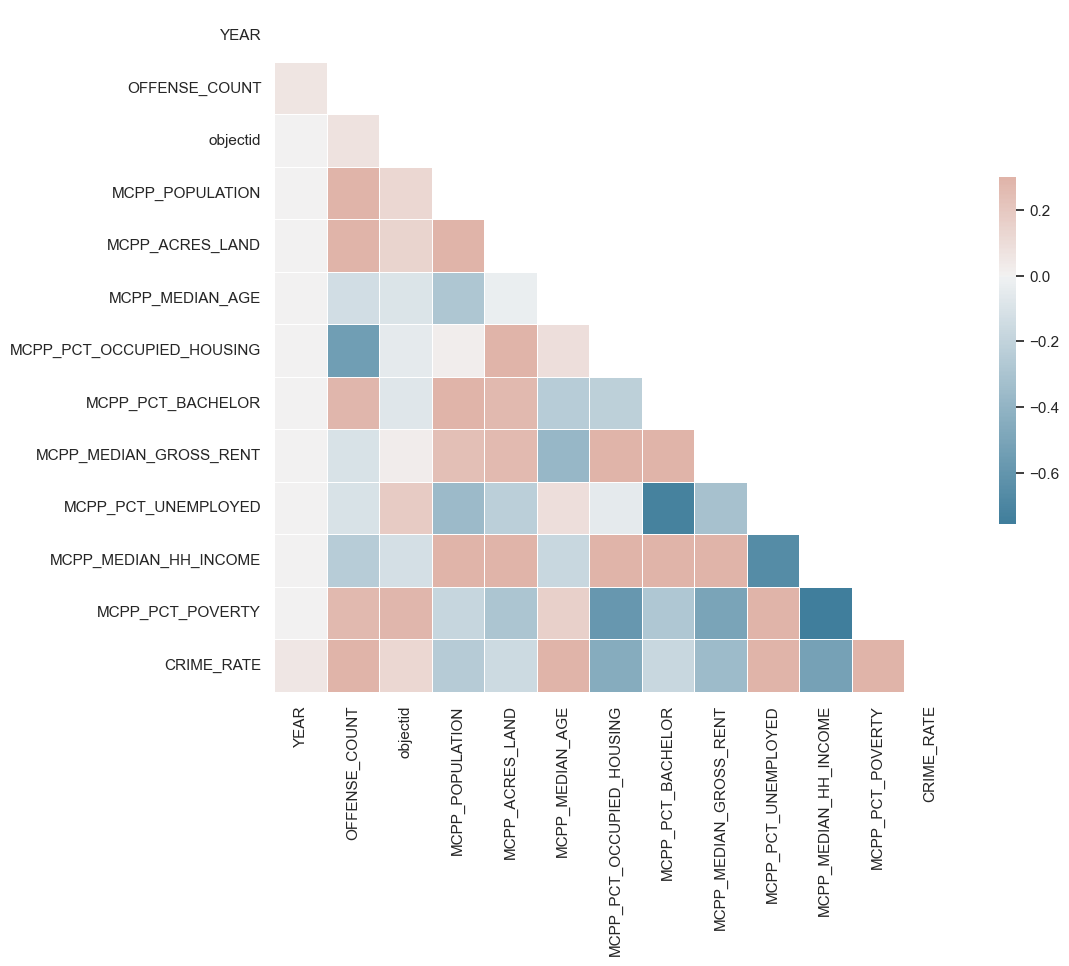

In [ ]:
#correlation matrix to know the relationship with CRIME_RATE
#reference: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = crime_census_df.iloc[:, 2:].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Analysis**

* objectid represent MCPP
* Possible important features to crime rate are: POPULATION (part of it), NO_HOUSEHOLD, HOUSING_UNIT.
* Feature selection: remove highly correlated data.
    * Surprisingly the time features have low correlation even with itself
    * Remove highly correlated values.
    * Pick one between: PCT_HS_GRAD (X) and PCT_BACHELOR (PICK, lower correl coeff with others)  
    * Pick: MEDIAN_HH_INCOME (pick), PCT_POVERTY (X, highly correl with HH_INCOME), PCT_OWNER_OCC_HOUSING (X), MEDIAN_GROSS_RENT (PICK), PCT_UNEMPLOYED (PICK, low correl so still ok?)
    * PICK: NO_HOUSEHOLD (X), HOUSING_UNIT (pick this, might be related to burglary)
    * Delete (X): PCT_OWNER_OCC_HOUSING (high corraletion with poverty). Also with median hh income..
    * Delete (X): PCT_OCC_HOUSING (correlated with HOUSING_UNIT)
    * Total deletion: PCT_HS_GRAD, PCT_POVERTY, PCT_OWNER_OCC_HOUSING, NO_HOUSEHOLD
* interestingly, it does not correlate well with place features (GEOID or NEIGHBORHOOD), and low correlation with time features.

#### Check numbers (NOT USED for modeling)

In [ ]:
#check numbers
#calculate mcpp average yearly offense count and crime rate for 2010 - 2019

mcpp_CR_yr_df = crime_census_df.groupby('MCPP').agg({'OFFENSE_COUNT':  lambda x: (x.sum() /10),
                                     'MCPP_POPULATION' : 'mean',
                                    'CRIME_RATE':  lambda x: (x.sum() /10)}).rename(
    columns={"OFFENSE_COUNT": "AVG_YR_OFFENSE_COUNT", "CRIME_RATE": "AVG_YR_CRIME_RATE"})
mcpp_CR_yr_df
# crime_nb_df.groupby(['GEOID'],as_index=False).agg(TOT_OFFENSE =
#                                                         pd.NamedAgg('Offense Parent Group','count'))

,AVG_YR_OFFENSE_COUNT,MCPP_POPULATION,AVG_YR_CRIME_RATE
MCPP,,,
ALASKA JUNCTION,857.2,10805.0,79.335
ALKI,306.2,6984.0,43.844
BALLARD NORTH,1311.3,26962.0,48.635
BALLARD SOUTH,1897.2,16164.0,117.372
BELLTOWN,1707.9,7570.0,225.614
BITTERLAKE,1223.8,17081.0,71.648
BRIGHTON/DUNLAP,829.0,7877.0,105.243
CAPITOL HILL,3812.2,22289.0,171.035
CENTRAL AREA/SQUIRE PARK,1496.8,16393.0,91.309


In [ ]:
mcpp_CR_yr_df.describe().round(2)

,AVG_YR_OFFENSE_COUNT,MCPP_POPULATION,AVG_YR_CRIME_RATE
count,58.00,58.00,58.00
mean,1050.15,10259.55,140.02
std,1035.77,8768.71,174.06
min,21.40,711.00,16.55
25%,389.08,3745.25,58.23
50%,724.80,7712.00,91.28
75%,1300.25,12491.00,126.84
max,5474.70,36037.00,986.94


In [ ]:
#average annual crime rate per 1000 people
(mcpp_CR_yr_df['AVG_YR_OFFENSE_COUNT'].sum())/ (mcpp_CR_yr_df['MCPP_POPULATION'].sum()) * 1000

102.35844141876201

The reported total Crime Rate from FBI website (https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/explorer/crime/crime-trend) is 6000 crimes per 100,000 people per year.

In [ ]:
#estimate total annual offense count and population. Divide number to get the crime rate and compare with above number
mcpp_CR_yr_df.iloc[:,:2].sum().round(1)

AVG_YR_OFFENSE_COUNT     60908.8
MCPP_POPULATION         595054.0
dtype: float64

#### Get quantile rank (for post-processing)

In [ ]:
#If we divide the sample non equally but divide per quantiles
crime_census_df['CRIME_RATE'].quantile([.25, .5, 0.75, 0.883])

0.250    14.46000
0.500    22.17000
0.750    32.22750
0.883    59.27961
Name: CRIME_RATE, dtype: float64

In [ ]:
#check with CRIME_RATE (target var) descriptive statistic
crime_census_df["CRIME_RATE"].describe().round(2)

#result is the same

count    2320.00
mean       35.01
std        44.44
min         0.77
25%        14.46
50%        22.17
75%        32.23
max       401.85
Name: CRIME_RATE, dtype: float64

<Axes: >

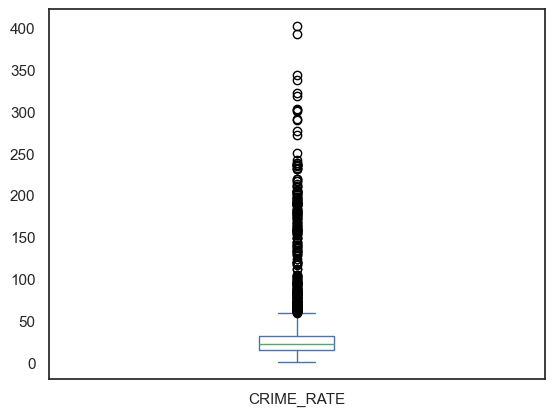

In [ ]:
#get visualization for better understanding
crime_census_df["CRIME_RATE"].plot.box()

In [ ]:
#source: https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/

Q3 = np.quantile(crime_census_df['CRIME_RATE'], 0.75)
Q1 = np.quantile(crime_census_df['CRIME_RATE'], 0.25)
IQR = Q3 - Q1
up_range = Q3 + 1.5 * IQR
up_range

58.87875

In [ ]:
#it is better to use quantile for distribution since there are a lot of outliers (MCPP with very high crime rate)
#source: https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/

qcut_series, qcut_intervals = pd.qcut(crime_census_df['CRIME_RATE'],
        q=[0, 0.25, 0.5, 0.75, 0.883, 1], #specify based on boxplot above (Q1, Q2, Q3, upper whisker)
        labels=["LOW", "MED", "MED_HIGH", "HIGH", "VERY_HIGH"],
        retbins=True) #["LOW", "MED", "MED-HIGH", "HIGH"]).value_counts()
qcut_series.value_counts()

CRIME_RATE
LOW          583
MED          580
MED_HIGH     577
HIGH         308
VERY_HIGH    272
Name: count, dtype: int64

In [ ]:
qcut_intervals.tolist()[1:]

[14.46, 22.17, 32.2275, 59.27960999999991, 401.85]

In [ ]:
qcut_series.value_counts().tolist()

[583, 580, 577, 308, 272]

In [ ]:
labels = ["LOW", "MED", "MED_HIGH", "HIGH", "VERY_HIGH"]
cr_range = pd.DataFrame(
    {'RANGE': labels,
     'UP_INTERVAL': qcut_intervals.tolist()[1:]
    })
cr_range

,RANGE,UP_INTERVAL
0,LOW,14.46000
1,MED,22.17000
2,MED_HIGH,32.22750
3,HIGH,59.27961
4,VERY_HIGH,401.85000


In [ ]:
cr_range.to_csv("crime_rate_value_range.csv")